## What does the data mean?

In [33]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Number of data points is 57,891,462. We need a way to reduce this for visualization / initial analysis.

In [4]:
!wc -l /home/slothrop/smart-shores/data/Hwy\ 16\ at\ Davis\ Bay.txt

57891462 /home/slothrop/smart-shores/data/Hwy 16 at Davis Bay.txt


Here are the top five lines of data. What does each columb represent?

In [5]:
!head -n 5 /home/slothrop/smart-shores/data/Hwy\ 16\ at\ Davis\ Bay.txt

For <b>Vancouver</b> we have Latitude = 49.25, Longtitude = -123.12. So the first column of data is longtitude, the second is latitude. It will be better to get a sense of this in terms of standard units [m] or [cm]. 

Extract a random sample (size after -n ) of the original data.

In [25]:
!shuf -n 100000 /home/slothrop/smart-shores/data/Hwy\ 16\ at\ Davis\ Bay.txt > /home/slothrop/smart-shores/sample.txt

In [26]:
data = pd.read_csv('/home/slothrop/smart-shores/sample.txt',sep=" ", header=None)

In [27]:
column_names = ['lon', 'lat', 'z', 'r', 'g', 'b', 'j', 'k', 'l']
data.columns = column_names

In [28]:
data.shape

(100000, 9)

In [29]:
data.head()

,lon,lat,z,r,g,b,j,k,l
0,-123.725308,49.437962,-0.687921,106,75,37,-0.053307,-0.002214,0.998576
1,-123.729018,49.447987,6.980163,103,106,25,-0.190216,-0.074626,0.978902
2,-123.729289,49.448353,10.533213,140,107,28,0.279738,0.342100,0.897059
3,-123.726352,49.437974,-0.898937,191,161,105,-0.113919,-0.015048,0.993376
4,-123.727873,49.442484,6.706215,160,135,103,-0.016119,-0.706714,0.707316


In [30]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lon,100000,-123.727426,0.002643,-123.733883,-123.729162,-123.727713,-123.725340,-123.721675
lat,100000,49.442998,0.004354,49.436302,49.439565,49.441430,49.446432,49.452784
z,100000,3.449631,6.838819,-16.009102,-1.183224,1.150117,4.536839,41.830987
r,100000,144.808490,59.047010,3.000000,103.000000,155.000000,192.000000,255.000000
g,100000,121.749710,51.586273,3.000000,85.000000,126.000000,162.000000,255.000000
b,100000,70.592650,48.248726,0.000000,28.000000,62.000000,108.000000,255.000000
j,100000,-0.079039,0.323332,-0.999933,-0.167232,-0.053035,0.036077,0.999764
k,100000,-0.043671,0.318303,-0.999802,-0.119680,-0.021662,0.056272,0.999875
l,100000,0.828529,0.315479,-0.932327,0.829862,0.984121,0.996423,0.999996


Based on the above data and converting second changes let's figure out what kind of area we are dealing with.

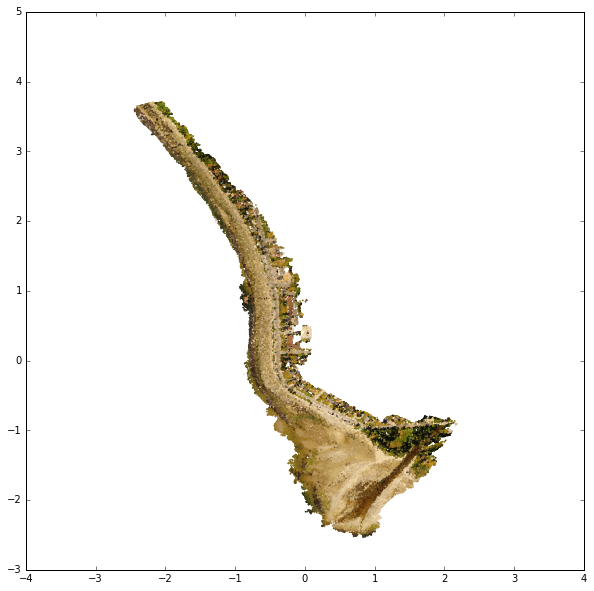

In [34]:
scaler = StandardScaler()

lon_ = scaler.fit_transform(data['lon'].values.reshape(-1,1)).ravel()
lat_ = data['lat'].values
lat_ = (lat_ - lat_.mean()) / scaler.scale_
z_ = data['z'].values
z_ = (z_ - z_.mean()) / scaler.scale_

lon_lat_z_ = np.vstack((lon_, lat_, z_)).T

rgb = data.loc[:, ['r','g','b']].values
rgb_01 = rgb/255

plt.figure(figsize=(10, 10))
plt.scatter(lon_lat_z_[:, 0], lon_lat_z_[:, 1], s=3, c=rgb_01,lw=0);
plt.axis('equal');